In [193]:
import pyodbc

conn = pyodbc.connect(
    "Driver={ODBC Driver 18 for SQL Server};"
    "Server=localhost;"
    "Database=Airbnb;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"
)

print("CONNECTED")


CONNECTED


In [194]:
import pandas as pd

query = """
SELECT 
    f.Price,
    p.PropertyType,
    p.RoomType,
    p.Accomodates,
    p.Bedrooms,
    p.Beds,
    p.Bathrooms,
    l.Region,
    l.NeighbourhoodCleansed,
    f.NumberOfReviews,
    f.ReviewsPerMonth,
    f.ReviewScoresRating,
    f.ReviewScoresCleanliness,
    f.ReviewScoresLocation,
    f.ReviewScoresValue,
    f.ReviewScoresCommunication,
    f.ReviewScoresCheckIN,
    f.Availability30,
    f.Availability60,
    f.Availability90,
    f.Availability365,
    h.HostIsSuperHost,
    h.HostResponseTime
FROM DW.FactListing f
JOIN DW.DimProperty p ON f.PropertyID = p.PropertyID
JOIN DW.DimLocation l ON f.LocationID = l.LocationID
JOIN DW.DimHost h ON f.HostID = h.HostID
"""

df = pd.read_sql(query, conn)
df = df[df['Price']<5000]


C:\Users\peter\AppData\Local\Temp\ipykernel_24992\1040707432.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [195]:
cat_cols = ['RoomType', 'Region', 'HostResponseTime','PropertyType','NeighbourhoodCleansed']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [196]:
df

,Price,Accomodates,Bedrooms,Beds,Bathrooms,NumberOfReviews,ReviewsPerMonth,ReviewScoresRating,ReviewScoresCleanliness,ReviewScoresLocation,...,NeighbourhoodCleansed_Σφακίων,NeighbourhoodCleansed_Σύμης (Symi),NeighbourhoodCleansed_Σύρου - Ερμούπολης (Syros),NeighbourhoodCleansed_Τήλου (Tilos),NeighbourhoodCleansed_Τήνου (Tinos),NeighbourhoodCleansed_Φαιστού,NeighbourhoodCleansed_Φολεγάνδρου (Folegandros),NeighbourhoodCleansed_Χάλκης (Halki),NeighbourhoodCleansed_Χανίων,NeighbourhoodCleansed_Χερσονήσου
0,125,6,2.0,3.0,1.0,61,0.56,4.95,4.85,4.78,...,False,False,False,False,False,False,False,False,False,False
1,54,4,1.0,3.0,1.0,71,0.96,4.87,4.93,4.75,...,False,False,False,False,False,False,False,False,False,False
2,90,5,2.0,5.0,2.0,41,1.07,4.98,5.00,4.88,...,False,False,False,False,False,False,False,False,False,False
3,57,2,1.0,1.0,1.0,33,0.87,4.94,4.97,5.00,...,False,False,False,False,False,False,False,False,False,False
4,342,8,4.0,4.0,3.0,2,0.04,5.00,5.00,5.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74498,67,3,2.0,2.0,1.0,33,0.62,4.64,4.70,4.94,...,False,False,False,False,False,False,False,False,False,False
74499,50,2,1.0,1.0,1.0,8,0.17,5.00,5.00,4.88,...,False,False,False,False,False,False,False,False,False,False
74500,49,2,1.0,2.0,1.0,142,4.45,4.63,4.50,4.68,...,False,False,False,False,False,False,False,False,False,False
74501,32,2,0.0,1.0,1.0,0,-1.00,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [197]:
list(df.columns)


['Price',
 'Accomodates',
 'Bedrooms',
 'Beds',
 'Bathrooms',
 'NumberOfReviews',
 'ReviewsPerMonth',
 'ReviewScoresRating',
 'ReviewScoresCleanliness',
 'ReviewScoresLocation',
 'ReviewScoresValue',
 'ReviewScoresCommunication',
 'ReviewScoresCheckIN',
 'Availability30',
 'Availability60',
 'Availability90',
 'Availability365',
 'HostIsSuperHost',
 'RoomType_Hotel room',
 'RoomType_Private room',
 'RoomType_Shared room',
 'Region_Athens',
 'Region_Crete',
 'Region_Skg',
 'HostResponseTime_a few days or more',
 'HostResponseTime_within a day',
 'HostResponseTime_within a few hours',
 'HostResponseTime_within an hour',
 'PropertyType_Boat',
 'PropertyType_Bus',
 'PropertyType_Camper/RV',
 'PropertyType_Campsite',
 'PropertyType_Casa particular',
 'PropertyType_Castle',
 'PropertyType_Cave',
 'PropertyType_Cycladic home',
 'PropertyType_Dammuso',
 'PropertyType_Dome',
 'PropertyType_Earthen home',
 'PropertyType_Entire bed and breakfast',
 'PropertyType_Entire bungalow',
 'PropertyType_E

LASSO MODEL IMPROVEMENTS
Best alpha found by LassoCV: 0.208061
Number of non-zero coefficients: 195/232

--- TRAINING SET ---
MAE:  $101.12
RMSE: $219.87
R²:   0.5143

--- TEST SET ---
MAE:  $100.11
RMSE: $213.22
R²:   0.5120
MAPE: 66.72%

--- OVERFITTING CHECK ---
R² difference (Train - Test): 0.0022
✓ Model generalization looks good

--- NON-ZERO COEFFICIENTS ---
Positive coefficients: 86
Negative coefficients: 109

Top 5 Positive Features:
Bathrooms                                  155.775072
NeighbourhoodCleansed_Μυκόνου (Μykonos)     45.472168
Bedrooms                                    38.697588
NeighbourhoodCleansed_Θήρας (Santorini)     31.786173
PropertyType_Entire villa                   22.444178
dtype: float64

Top 5 Negative Features:
ReviewsPerMonth                   -27.024183
Beds                              -26.369793
Region_Crete                      -19.731748
PropertyType_Cycladic home        -10.883791
HostResponseTime_within an hour   -10.440418
dtype: float64


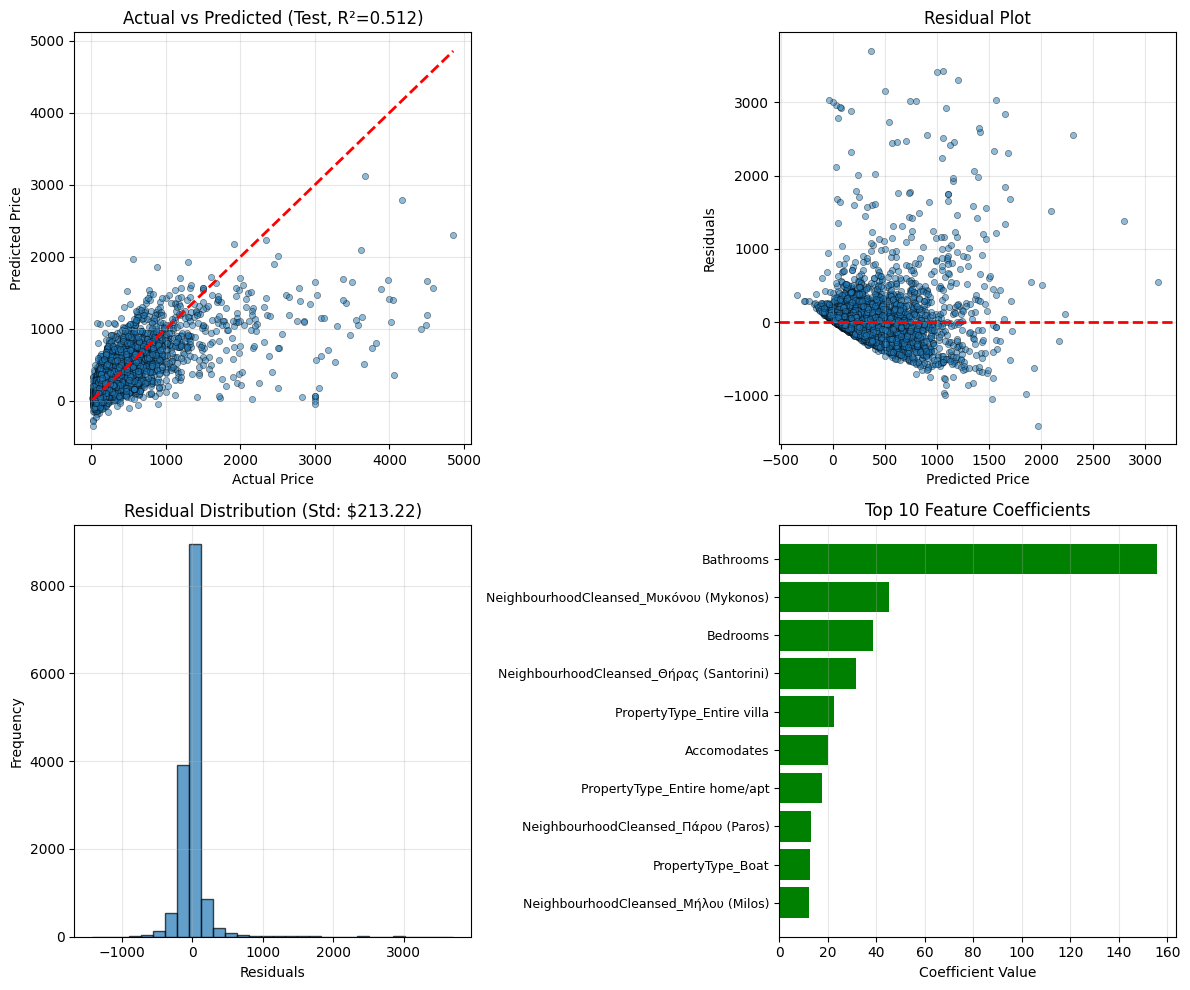

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# target
y = df["Price"]

# features
X = df.drop(columns=["Price"])

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 80% train, 20% test
    random_state=42
)

imputer = SimpleImputer(strategy="median")

X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# =========================
# 2) Scale features (important for Lasso)
# =========================
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

# =========================
# 3) Train Lasso with cross-validation
# =========================
lasso_cv = LassoCV(cv=5, random_state=42, n_jobs=-1, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("="*50)
print("LASSO MODEL IMPROVEMENTS")
print("="*50)
print(f"Best alpha found by LassoCV: {lasso_cv.alpha_:.6f}")
print(f"Number of non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)}/{len(lasso_cv.coef_)}")

# =========================
# 4) Predict
# =========================
y_pred_train = lasso_cv.predict(X_train_scaled)
y_pred_test = lasso_cv.predict(X_test_scaled)

# =========================
# 5) Enhanced Evaluation
# =========================
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("\n--- TRAINING SET ---")
print(f"MAE:  ${mae_train:.2f}")
print(f"RMSE: ${rmse_train:.2f}")
print(f"R²:   {r2_train:.4f}")

print("\n--- TEST SET ---")
print(f"MAE:  ${mae_test:.2f}")
print(f"RMSE: ${rmse_test:.2f}")
print(f"R²:   {r2_test:.4f}")
print(f"MAPE: {mape_test:.2%}")

# Check for overfitting
print("\n--- OVERFITTING CHECK ---")
print(f"R² difference (Train - Test): {r2_train - r2_test:.4f}")
if r2_train - r2_test > 0.1:
    print("⚠️  Possible overfitting detected (high train/test gap)")
else:
    print("✓ Model generalization looks good")

# =========================
# 6) Feature Analysis
# =========================
coef = pd.Series(lasso_cv.coef_, index=X.columns)
nonzero = coef[coef != 0].sort_values()

print("\n--- NON-ZERO COEFFICIENTS ---")
print(f"Positive coefficients: {len(coef[coef > 0])}")
print(f"Negative coefficients: {len(coef[coef < 0])}")
print("\nTop 5 Positive Features:")
print(coef[coef > 0].sort_values(ascending=False).head(5))
print("\nTop 5 Negative Features:")
print(coef[coef < 0].sort_values().head(5))

# =========================
# 7) Visualization
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Actual vs Predicted (Test, R²={r2_test:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Residuals
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Residual Distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Residual Distribution (Std: ${residuals.std():.2f})')
axes[1, 0].grid(True, alpha=0.3)

# Feature Coefficients
top_features = coef[coef != 0].sort_values().tail(10)
axes[1, 1].barh(range(len(top_features)), top_features.values, color=['red' if x < 0 else 'green' for x in top_features.values])
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features.index, fontsize=9)
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "="*50)

In [199]:
import pandas as pd

    #l.NeighbourhoodCleansed,
query = """
SELECT 
    f.Price,
    p.Accomodates,
    p.PropertyType,
    p.RoomType,
    l.Region,
    p.Bedrooms,
    p.Bathrooms,
    f.ReviewScoresRating,
    p.MinimumNights,
    f.Availability365

FROM DW.FactListing f
JOIN DW.DimProperty p ON f.PropertyID = p.PropertyID
JOIN DW.DimLocation l ON f.LocationID = l.LocationID
"""

df2 = pd.read_sql(query, conn)
df2


C:\Users\peter\AppData\Local\Temp\ipykernel_24992\4058366689.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query, conn)


,Price,Accomodates,PropertyType,RoomType,Region,Bedrooms,Bathrooms,ReviewScoresRating,MinimumNights,Availability365
0,48,3,Room in hotel,Private room,Crete,1.0,1.0,4.90,1,268
1,56,2,Entire place,Entire home/apt,Aegean,1.0,1.0,4.42,1,235
2,289,10,Cycladic home,Entire home/apt,Aegean,4.0,3.0,3.67,1,17
3,750,8,Entire villa,Entire home/apt,Crete,4.0,3.0,4.96,1,140
4,102,5,Entire rental unit,Entire home/apt,Aegean,2.0,1.0,4.92,3,21
...,...,...,...,...,...,...,...,...,...,...
74498,54,6,Entire rental unit,Entire home/apt,Athens,2.0,1.0,5.00,2,328
74499,77,4,Entire condo,Entire home/apt,Crete,1.0,1.0,4.64,3,43
74500,463,4,Entire home,Entire home/apt,Aegean,2.0,2.5,NaN,1,335
74501,293,8,Entire home,Entire home/apt,Aegean,4.0,3.0,5.00,5,365


In [200]:
cat_cols = ['PropertyType', 'RoomType', 'Region']

# IMPORTANT: Save the original columns before one-hot encoding
# df2_original_neighborhood = df2['NeighbourhoodCleansed'].copy()
#df2_original_region = df2['Region'].copy()

# Now one-hot encode
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

In [201]:
df

,Price,Accomodates,Bedrooms,Beds,Bathrooms,NumberOfReviews,ReviewsPerMonth,ReviewScoresRating,ReviewScoresCleanliness,ReviewScoresLocation,...,NeighbourhoodCleansed_Σφακίων,NeighbourhoodCleansed_Σύμης (Symi),NeighbourhoodCleansed_Σύρου - Ερμούπολης (Syros),NeighbourhoodCleansed_Τήλου (Tilos),NeighbourhoodCleansed_Τήνου (Tinos),NeighbourhoodCleansed_Φαιστού,NeighbourhoodCleansed_Φολεγάνδρου (Folegandros),NeighbourhoodCleansed_Χάλκης (Halki),NeighbourhoodCleansed_Χανίων,NeighbourhoodCleansed_Χερσονήσου
0,125,6,2.0,3.0,1.0,61,0.56,4.95,4.85,4.78,...,False,False,False,False,False,False,False,False,False,False
1,54,4,1.0,3.0,1.0,71,0.96,4.87,4.93,4.75,...,False,False,False,False,False,False,False,False,False,False
2,90,5,2.0,5.0,2.0,41,1.07,4.98,5.00,4.88,...,False,False,False,False,False,False,False,False,False,False
3,57,2,1.0,1.0,1.0,33,0.87,4.94,4.97,5.00,...,False,False,False,False,False,False,False,False,False,False
4,342,8,4.0,4.0,3.0,2,0.04,5.00,5.00,5.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74498,67,3,2.0,2.0,1.0,33,0.62,4.64,4.70,4.94,...,False,False,False,False,False,False,False,False,False,False
74499,50,2,1.0,1.0,1.0,8,0.17,5.00,5.00,4.88,...,False,False,False,False,False,False,False,False,False,False
74500,49,2,1.0,2.0,1.0,142,4.45,4.63,4.50,4.68,...,False,False,False,False,False,False,False,False,False,False
74501,32,2,0.0,1.0,1.0,0,-1.00,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


Data shape: (74503, 111)
Finding optimal number of clusters...
  k=2: inertia=8195164.22 (1.4s)
  k=3: inertia=7996661.67 (1.8s)
  k=4: inertia=7873965.18 (2.2s)
  k=5: inertia=7858455.45 (2.7s)
  k=6: inertia=7743778.62 (3.2s)
  k=7: inertia=7615573.50 (3.8s)
  k=8: inertia=7566427.90 (4.5s)
  k=9: inertia=7514752.20 (5.2s)
  k=10: inertia=7409123.73 (5.8s)


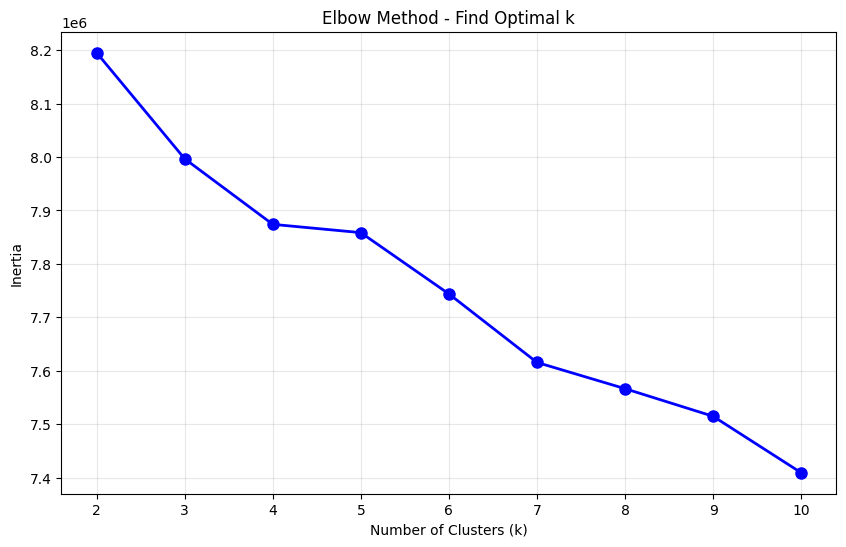


Training final model with k=3...

Cluster Distribution:
  Cluster 0: 52,300 listings (70.2%)
  Cluster 1: 11,552 listings (15.5%)
  Cluster 2: 10,651 listings (14.3%)

CLUSTER CHARACTERISTICS

Cluster 0:
  Count:        52,300
  Mean Price:   $124.84
  Median Price: $89.00
  Avg Accommodates: 3.5
  Avg Bedrooms: 1.3

Cluster 1:
  Count:        11,552
  Mean Price:   $208.04
  Median Price: $132.00
  Avg Accommodates: 4.9
  Avg Bedrooms: 2.0

Cluster 2:
  Count:        10,651
  Mean Price:   $792.34
  Median Price: $373.00
  Avg Accommodates: 8.3
  Avg Bedrooms: 3.8

Total runtime: 6.22 seconds


In [202]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import time

start_time = time.time()

# Prepare data
imputer = SimpleImputer(strategy="median")
df2imp = imputer.fit_transform(df2)

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2imp)

print(f"Data shape: {df2_scaled.shape}")

# =========================
# ELBOW METHOD - WITHOUT SILHOUETTE (MUCH FASTER)
# =========================
inertias = []
K_range = range(2, 11)

print("Finding optimal number of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=3, max_iter=300, algorithm='lloyd')
    kmeans.fit(df2_scaled)
    inertias.append(kmeans.inertia_)
    elapsed = time.time()-start_time
    print(f"  k={k}: inertia={kmeans.inertia_:.2f} ({elapsed:.1f}s)")

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Find Optimal k')
plt.grid(True, alpha=0.3)
plt.show()

# Choose k manually from elbow plot (look for the "elbow")
optimal_k = 3

# =========================
# TRAIN K-MEANS WITH CHOSEN K
# =========================
print(f"\nTraining final model with k={optimal_k}...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=3, algorithm='lloyd')
clusters = kmeans_final.fit_predict(df2_scaled)

# Add cluster labels to data
df2['Cluster'] = clusters

print(f"\nCluster Distribution:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    percentage = (count / len(clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} listings ({percentage:.1f}%)")

# Price statistics by cluster
print("\n" + "="*60)
print("CLUSTER CHARACTERISTICS")
print("="*60)

for cluster_id in range(optimal_k):
    cluster_data = df2[df2['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  Count:        {len(cluster_data):,}")
    print(f"  Mean Price:   ${cluster_data['Price'].mean():.2f}")
    print(f"  Median Price: ${cluster_data['Price'].median():.2f}")
    if 'Accomodates' in df2.columns:
        print(f"  Avg Accommodates: {cluster_data['Accomodates'].mean():.1f}")
    if 'Bedrooms' in df2.columns:
        print(f"  Avg Bedrooms: {cluster_data['Bedrooms'].mean():.1f}")
    
    # ADD REGION LABELS HERE
    if 'Region' in df2.columns:
        print(f"  Region Distribution:")
        region_counts = cluster_data['Region'].value_counts()
        for region, count in region_counts.items():
            percentage = (count / len(cluster_data)) * 100
            print(f"    {region}: {count:,} ({percentage:.1f}%)")

print(f"\nTotal runtime: {time.time() - start_time:.2f} seconds")

In [203]:
df2

,Price,Accomodates,Bedrooms,Bathrooms,ReviewScoresRating,MinimumNights,Availability365,PropertyType_Boat,PropertyType_Bus,PropertyType_Camper/RV,...,PropertyType_Treehouse,PropertyType_Windmill,PropertyType_Yurt,RoomType_Hotel room,RoomType_Private room,RoomType_Shared room,Region_Athens,Region_Crete,Region_Skg,Cluster
0,48,3,1.0,1.0,4.90,1,268,False,False,False,...,False,False,False,False,True,False,False,True,False,0
1,56,2,1.0,1.0,4.42,1,235,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,289,10,4.0,3.0,3.67,1,17,False,False,False,...,False,False,False,False,False,False,False,False,False,2
3,750,8,4.0,3.0,4.96,1,140,False,False,False,...,False,False,False,False,False,False,False,True,False,2
4,102,5,2.0,1.0,4.92,3,21,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74498,54,6,2.0,1.0,5.00,2,328,False,False,False,...,False,False,False,False,False,False,True,False,False,0
74499,77,4,1.0,1.0,4.64,3,43,False,False,False,...,False,False,False,False,False,False,False,True,False,0
74500,463,4,2.0,2.5,NaN,1,335,False,False,False,...,False,False,False,False,False,False,False,False,False,1
74501,293,8,4.0,3.0,5.00,5,365,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [204]:
print("\n" + "="*60)
print("REGION DISTRIBUTION BY CLUSTER")
print("="*60)

for cluster_id in range(optimal_k):
    cluster_data = df2[df2['Cluster'] == cluster_id]
    print(f"\n{'='*40}")
    print(f"CLUSTER {cluster_id} - {len(cluster_data):,} listings")
    print(f"{'='*40}")
    
    # Price summary
    print(f"Price: ${cluster_data['Price'].mean():.0f} avg, ${cluster_data['Price'].median():.0f} median")
    
    # Region breakdown
    if 'Region' in df2.columns:
        print("\nRegion Distribution:")
        region_counts = cluster_data['Region'].value_counts()
        for region, count in region_counts.items():
            percentage = (count / len(cluster_data)) * 100
            print(f"  {region}: {count:,} ({percentage:.1f}%)")
    
    # Property characteristics
    print(f"\nAvg Accommodates: {cluster_data['Accomodates'].mean():.1f}")
    print(f"Avg Bedrooms: {cluster_data['Bedrooms'].mean():.1f}")
    if 'Bathrooms' in df2.columns:
        print(f"Avg Bathrooms: {cluster_data['Bathrooms'].mean():.1f}")
    if 'ReviewScoresRating' in df2.columns:
        print(f"Avg Review Score: {cluster_data['ReviewScoresRating'].mean():.2f}")
    if 'MinimumNights' in df2.columns:
        print(f"Avg Min Nights: {cluster_data['MinimumNights'].mean():.1f}")
    if 'Availability365' in df2.columns:
        print(f"Avg Availability: {cluster_data['Availability365'].mean():.0f} days/year")



REGION DISTRIBUTION BY CLUSTER

CLUSTER 0 - 52,300 listings
Price: $125 avg, $89 median

Avg Accommodates: 3.5
Avg Bedrooms: 1.3
Avg Bathrooms: 1.2
Avg Review Score: 4.80
Avg Min Nights: 2.7
Avg Availability: 210 days/year

CLUSTER 1 - 11,552 listings
Price: $208 avg, $132 median

Avg Accommodates: 4.9
Avg Bedrooms: 2.0
Avg Bathrooms: 1.6
Avg Review Score: 4.86
Avg Min Nights: 3.6
Avg Availability: 207 days/year

CLUSTER 2 - 10,651 listings
Price: $792 avg, $373 median

Avg Accommodates: 8.3
Avg Bedrooms: 3.8
Avg Bathrooms: 3.4
Avg Review Score: 4.88
Avg Min Nights: 7.9
Avg Availability: 191 days/year


In [205]:
print("\n" + "="*70)
print("NEIGHBORHOOD DISTRIBUTION BY CLUSTER")
print("="*70)

# Get all neighborhoods sorted by total count (using the saved original column)
neighborhood_counts = df2_original_neighborhood.value_counts().sort_values(ascending=False)

for neighborhood in neighborhood_counts.index:
    # Create mask using the original neighborhood column
    mask = df2_original_neighborhood == neighborhood
    neighborhood_data = df2[mask]
    total_count = len(neighborhood_data)
    
    # Print neighborhood header
    print(f"\n{neighborhood}: {total_count:,} listings")
    
    # Get cluster distribution for this neighborhood
    cluster_counts = neighborhood_data['Cluster'].value_counts().sort_index()
    for cluster, count in cluster_counts.items():
        percentage = (count / total_count) * 100
        print(f"  Cluster {int(cluster)}: {count:,} ({percentage:.1f}%)")

print("\n" + "="*70)


NEIGHBORHOOD DISTRIBUTION BY CLUSTER

Χανίων: 5,330 listings
  Cluster 0: 3,811 (71.5%)
  Cluster 1: 645 (12.1%)
  Cluster 2: 874 (16.4%)

Ρόδου (Rhodes): 5,248 listings
  Cluster 0: 3,560 (67.8%)
  Cluster 1: 998 (19.0%)
  Cluster 2: 690 (13.1%)

Θήρας (Santorini): 5,200 listings
  Cluster 0: 3,577 (68.8%)
  Cluster 1: 1,009 (19.4%)
  Cluster 2: 614 (11.8%)

Thessaloniki: 3,824 listings
  Cluster 0: 2,619 (68.5%)
  Cluster 1: 595 (15.6%)
  Cluster 2: 610 (16.0%)

Μυκόνου (Μykonos): 3,608 listings
  Cluster 0: 2,576 (71.4%)
  Cluster 1: 634 (17.6%)
  Cluster 2: 398 (11.0%)

Πάρου (Paros): 3,324 listings
  Cluster 0: 2,311 (69.5%)
  Cluster 1: 582 (17.5%)
  Cluster 2: 431 (13.0%)

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ: 3,086 listings
  Cluster 0: 2,149 (69.6%)
  Cluster 1: 461 (14.9%)
  Cluster 2: 476 (15.4%)

Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades): 3,059 listings
  Cluster 0: 2,180 (71.3%)
  Cluster 1: 525 (17.2%)
  Cluster 2: 354 (11.6%)

Ρεθύμνης: 2,764 listings
  Cluster 0: 1,919 (69.4%

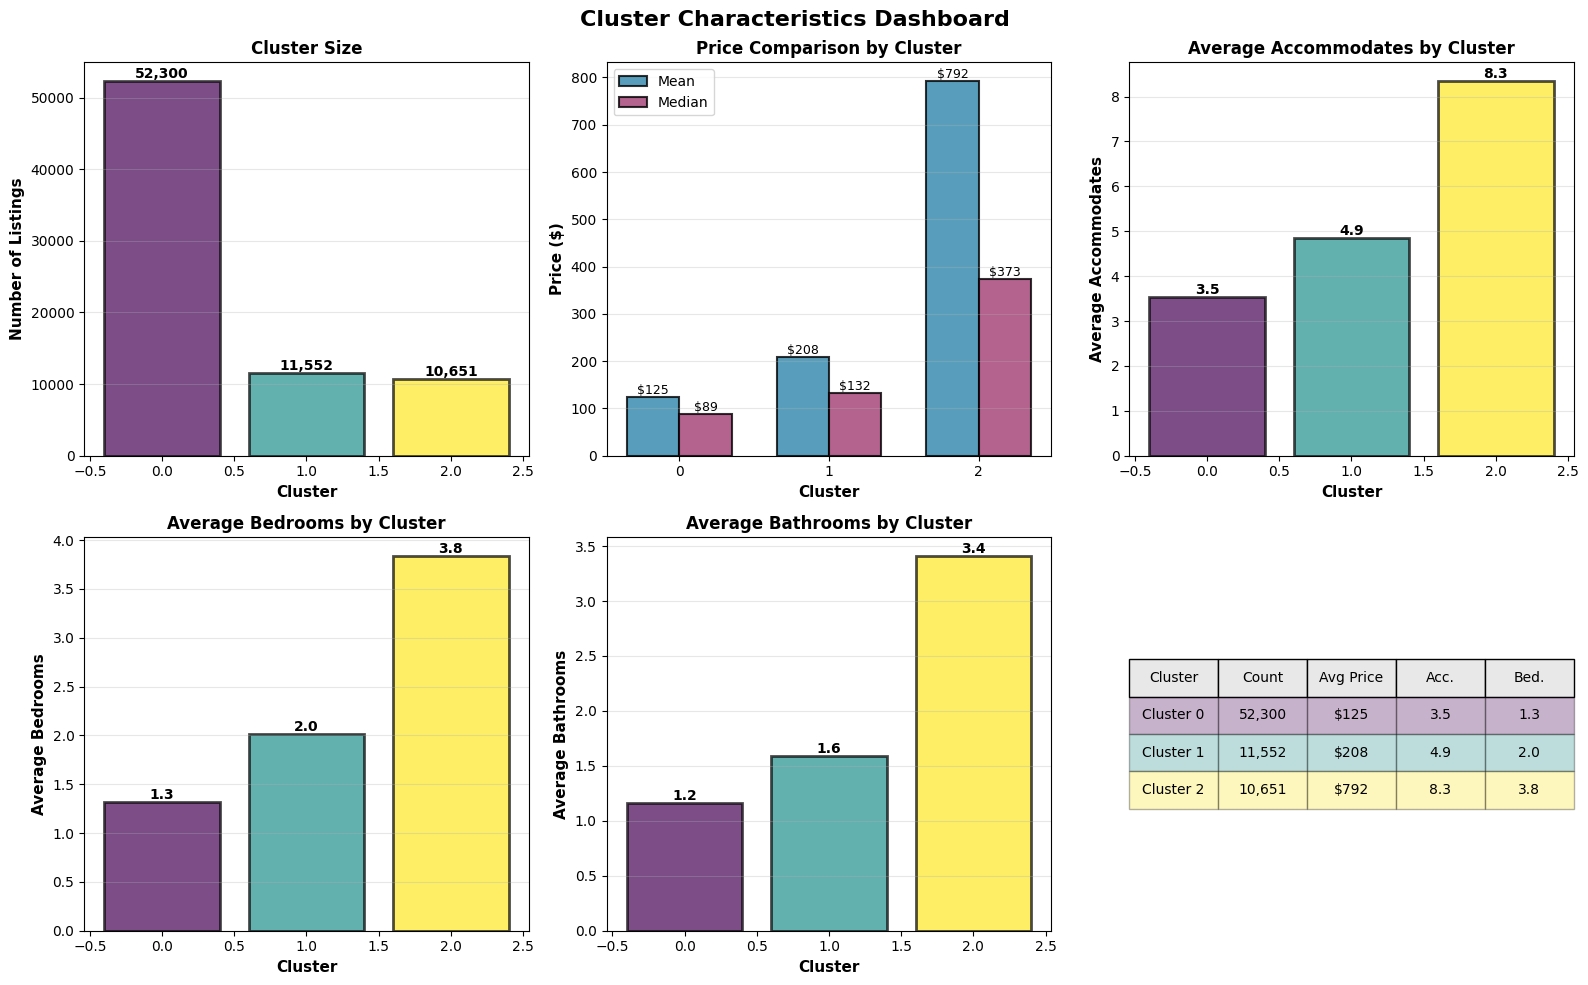


CLUSTER VISUALIZATION COMPLETE


In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Create comprehensive cluster visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Cluster Characteristics Dashboard', fontsize=16, fontweight='bold')

# Collect cluster statistics
cluster_stats = []
for cluster_id in range(optimal_k):
    cluster_data = df2[df2['Cluster'] == cluster_id]
    cluster_stats.append({
        'cluster': cluster_id,
        'count': len(cluster_data),
        'mean_price': cluster_data['Price'].mean(),
        'median_price': cluster_data['Price'].median(),
        'avg_accommodates': cluster_data['Accomodates'].mean(),
        'avg_bedrooms': cluster_data['Bedrooms'].mean(),
        'avg_bathrooms': cluster_data['Bathrooms'].mean() if 'Bathrooms' in df2.columns else 0,
    })

clusters = [s['cluster'] for s in cluster_stats]
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

# 1. Cluster Size (Count)
ax = axes[0, 0]
sizes = [s['count'] for s in cluster_stats]
bars = ax.bar(clusters, sizes, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Listings', fontsize=11, fontweight='bold')
ax.set_title('Cluster Size', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for i, (bar, size) in enumerate(zip(bars, sizes)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{size:,}', 
            ha='center', va='bottom', fontweight='bold')

# 2. Mean vs Median Price
ax = axes[0, 1]
x_pos = np.arange(len(clusters))
width = 0.35
mean_prices = [s['mean_price'] for s in cluster_stats]
median_prices = [s['median_price'] for s in cluster_stats]
bars1 = ax.bar(x_pos - width/2, mean_prices, width, label='Mean', color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x_pos + width/2, median_prices, width, label='Median', color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax.set_ylabel('Price ($)', fontsize=11, fontweight='bold')
ax.set_title('Price Comparison by Cluster', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(clusters)
ax.legend()
ax.grid(axis='y', alpha=0.3)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'${height:.0f}', 
                ha='center', va='bottom', fontsize=9)

# 3. Average Accommodates
ax = axes[0, 2]
accommodates = [s['avg_accommodates'] for s in cluster_stats]
bars = ax.bar(clusters, accommodates, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Accommodates', fontsize=11, fontweight='bold')
ax.set_title('Average Accommodates by Cluster', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accommodates):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.1f}', 
            ha='center', va='bottom', fontweight='bold')

# 4. Average Bedrooms
ax = axes[1, 0]
bedrooms = [s['avg_bedrooms'] for s in cluster_stats]
bars = ax.bar(clusters, bedrooms, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Bedrooms', fontsize=11, fontweight='bold')
ax.set_title('Average Bedrooms by Cluster', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for bar, bed in zip(bars, bedrooms):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bed:.1f}', 
            ha='center', va='bottom', fontweight='bold')

# 5. Average Bathrooms
ax = axes[1, 1]
bathrooms = [s['avg_bathrooms'] for s in cluster_stats]
bars = ax.bar(clusters, bathrooms, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Bathrooms', fontsize=11, fontweight='bold')
ax.set_title('Average Bathrooms by Cluster', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for bar, bath in zip(bars, bathrooms):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bath:.1f}', 
            ha='center', va='bottom', fontweight='bold')

# 6. Cluster Summary Table
ax = axes[1, 2]
ax.axis('tight')
ax.axis('off')
table_data = []
for stat in cluster_stats:
    table_data.append([
        f"Cluster {int(stat['cluster'])}",
        f"{stat['count']:,}",
        f"${stat['mean_price']:.0f}",
        f"{stat['avg_accommodates']:.1f}",
        f"{stat['avg_bedrooms']:.1f}"
    ])

table = ax.table(cellText=table_data,
                colLabels=['Cluster', 'Count', 'Avg Price', 'Acc.', 'Bed.'],
                cellLoc='center',
                loc='center',
                colColours=['#E8E8E8']*5)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Color code table rows
for i in range(len(cluster_stats)):
    for j in range(5):
        table[(i+1, j)].set_facecolor(colors[i])
        table[(i+1, j)].set_alpha(0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CLUSTER VISUALIZATION COMPLETE")
print("="*70)